In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

Initializing imports
Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


<IPython.core.display.Javascript object>


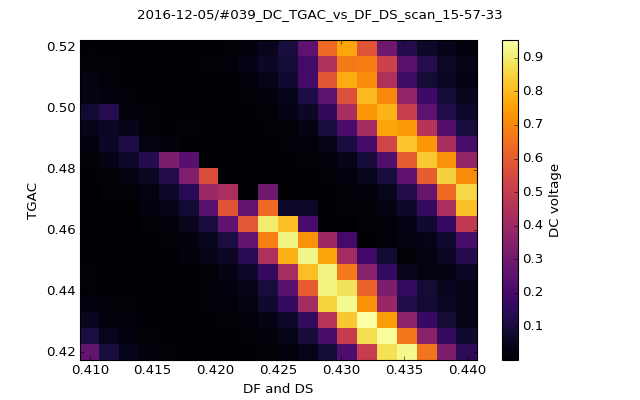

In [3]:
data = qc.load_data('2016-12-05/#039_DC_TGAC_vs_DF_DS_scan_15-57-33')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


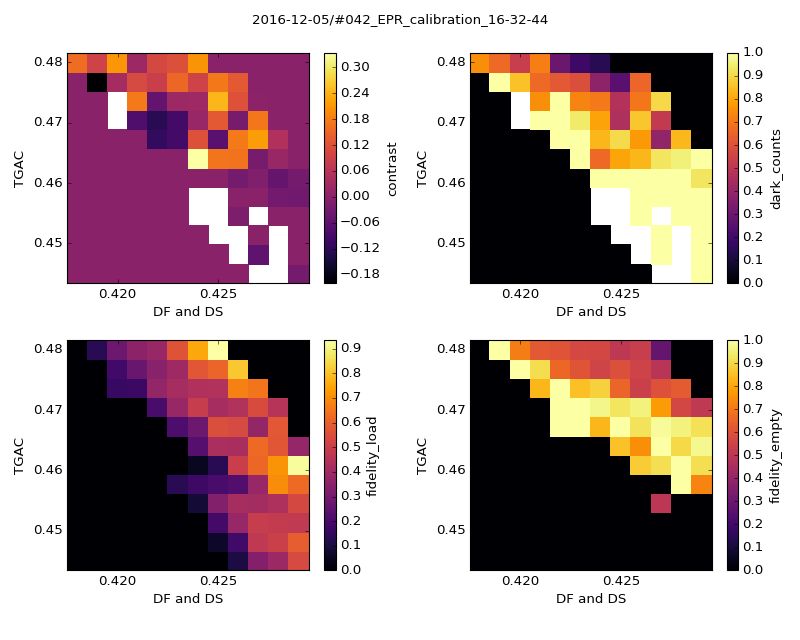

In [4]:
data = qc.load_data('2016-12-05/#042_EPR_calibration_16-32-44')
CalibrationPlot(data)

<IPython.core.display.Javascript object>


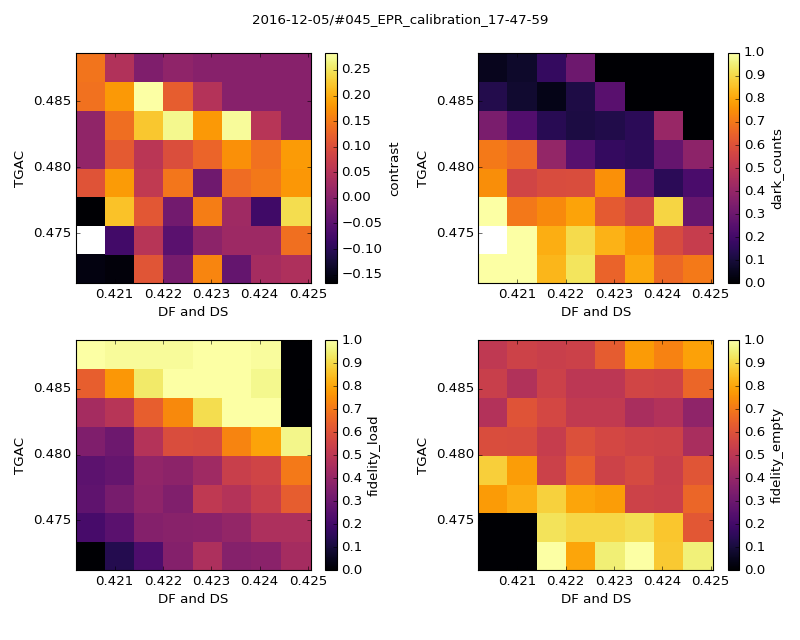

In [5]:
data = qc.load_data('2016-12-05/#045_EPR_calibration_17-47-59')
CalibrationPlot(data)

DF_DS(0.42201)
TGAC(0.4835)

fidelity_empty: 0.448
fidelity_load: 0.771
fidelity_read: 0.707
up_proportion: 0.328
dark_counts: 0.108
contrast: 0.220

<IPython.core.display.Javascript object>


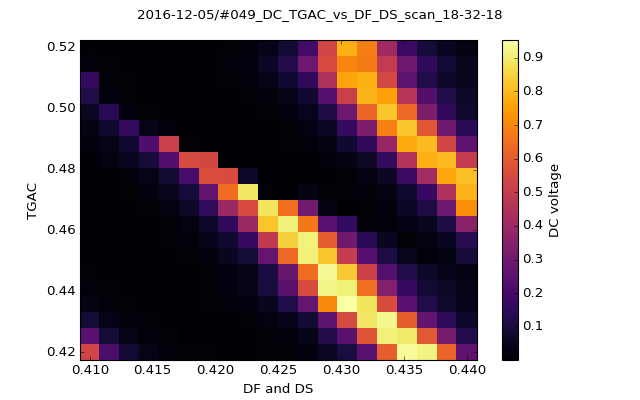

In [8]:
data = qc.load_data('2016-12-05/#049_DC_TGAC_vs_DF_DS_scan_18-32-18')
qc.MatPlot(data.DC_voltage)

Retuned with settings

DF_DS(0.42236)
TGAC(0.48218)

fidelity_empty: 0.615
fidelity_load: 0.621
fidelity_read: 0.760
up_proportion: 0.374
dark_counts: 0.087
contrast: 0.287

<IPython.core.display.Javascript object>


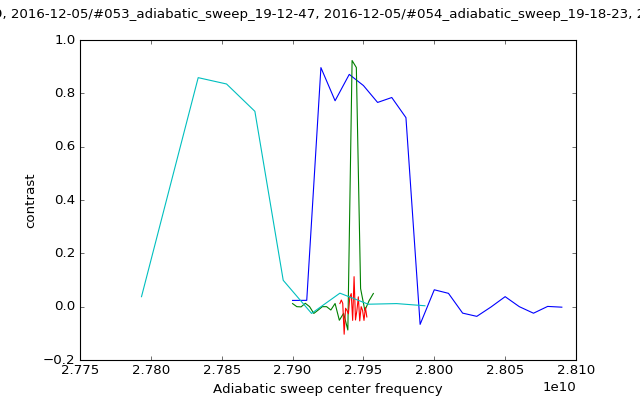

In [22]:
data = qc.load_data('2016-12-05/#052_adiabatic_sweep_19-07-59')
plot = qc.MatPlot(data.contrast)

data = qc.load_data('2016-12-05/#053_adiabatic_sweep_19-12-47')
plot.add(data.contrast)

data = qc.load_data('2016-12-05/#054_adiabatic_sweep_19-18-23')
plot.add(data.contrast)

data = qc.load_data('2016-12-05/#057_adiabatic_sweep_19-27-16')
plot.add(data.contrast)

Results looked better, but in the final scan with 10 MHz window, all of the contrast was gone.
The fourth scan was taken with a larger window, and the ESR frequency has clearly shifted

<IPython.core.display.Javascript object>


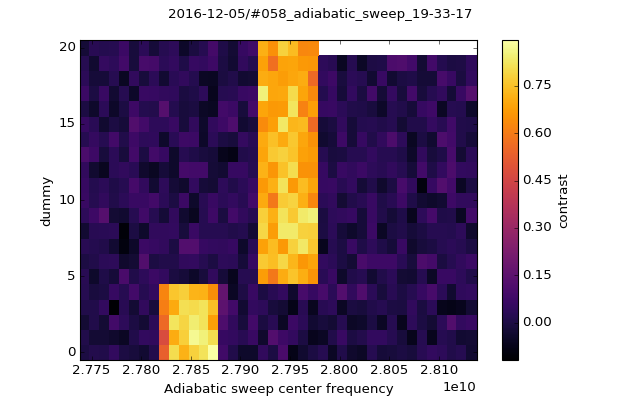

In [23]:
data = qc.load_data('2016-12-05/#058_adiabatic_sweep_19-33-17')
plot = qc.MatPlot(data.contrast)

After talking with Arne, we realized this was due to a shift of the nucleus.
Unfortunately we do not currently have a way to deal with this, so we will either have to implement NMR, or perform two successive ESR adiabatic sweeps.